In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('C:\\Users\\Master\\Desktop\\ok')
import myLib as my

In [2]:
x = np.array([30, 31, 32, 33, 34])
y = np.array([19, 22, 32, 47, 52])

In [3]:
x, y, a, b = sp.symbols('x y a b')
f = (y - (a*x + b))**2
print(f)
print(sp.diff(f, a))
print(sp.diff(f, b))

(-a*x - b + y)**2
-2*x*(-a*x - b + y)
2*a*x + 2*b - 2*y


In [4]:
del a, b
x = np.array([30, 31, 32, 33, 34])
y = np.array([19, 22, 32, 47, 52])

In [5]:
def error(b, a):
  return np.sum( np.square(y - (a * x + b)) )

def grad_fa(b, a):
  return np.sum( -2 * x * (-a * x - b + y) )

def grad_fb(b, a):
  return np.sum( 2 * a * x + 2 *b - 2 * y )

In [8]:
beta = np.array([0, 0])
lr = 0.0001
maxIter = 2000000
fval = [] 
for _ in range(maxIter):
  fval.append( error(*beta) )
  grad = np.array([ grad_fb(*beta), grad_fa(*beta) ])
  beta1 = beta - lr * grad
  beta = beta1

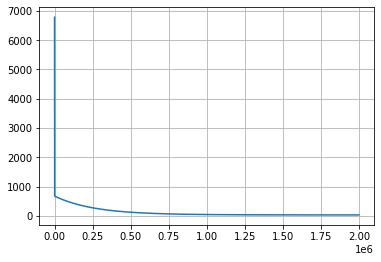

In [9]:
plt.plot(fval)
plt.grid()
plt.show()

In [17]:
beta

array([-251.57434903,    8.93701642])

In [18]:
yhat = beta[1] * x + beta[0]
R2 = 1 - np.sum( (y - yhat) ** 2) / np.sum( (y - np.mean(y)) ** 2 ) 
R2

0.9568121194283572

In [21]:
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression().fit(x.reshape(-1,1), y)
print(linearModel.score(x.reshape(-1,1), y))
print(linearModel.coef_)
print(linearModel.intercept_)

0.957119741100324
[9.1]
-256.8


In [22]:
def AdjustedR2( R2, x ):
  if x.ndim == 1: p, n = 1, x.shape[0]
  else: p, n = x.shape[1], x.shape[0]
  return 1 - (1 - R2) * ( n - 1) / ( n - p - 1 )

In [23]:
AdjustedR2( R2, x )

0.9424161592378096